In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The main goal on this dataset is to predict accurately with categorical data a binary variable. We should encode those features with our best methods and analyze which of them are the best to prediction. We will do a brevely summary of which methods were applied on the competition.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.max_columns',150)

###### Data description:

- On an overview we have patters inside the categorical data. For example, there is some pattern in the frequency offew columns. ¿Which method can we use on those cases? 

- In some columns, we saw cases in which are new categories on the test dataset compare to the same column on the train dataset. 

- We will see the distribution of the target variable

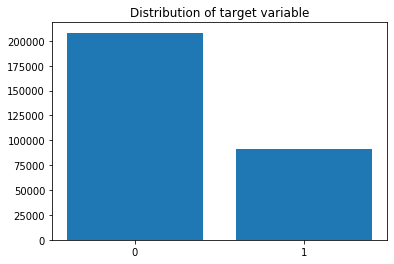

In [3]:
x = train.target.value_counts() #Defining our variables to plot
plt.bar(x.index,x) #Basic bar graph
plt.gca().set_xticks([0,1]) #setting the X axis space
plt.title('Distribution of target variable')
plt.show()

In [17]:
for cat_col in train.columns:
    print(cat_col, 'have',train[cat_col].nunique(),'unique values',train[cat_col].value_counts().to_dict())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



nom_1 have 6 unique values {'Trapezoid': 101181, 'Square': 49597, 'Star': 45904, 'Circle': 37320, 'Polygon': 36143, 'Triangle': 29855}
nom_2 have 6 unique values {'Lion': 101295, 'Cat': 49659, 'Snake': 45979, 'Dog': 37444, 'Axolotl': 36136, 'Hamster': 29487}
nom_3 have 6 unique values {'Russia': 101123, 'Canada': 49951, 'China': 46044, 'Finland': 36942, 'Costa Rica': 35988, 'India': 29952}
nom_4 have 4 unique values {'Oboe': 92293, 'Piano': 84517, 'Bassoon': 68448, 'Theremin': 54742}
nom_5 have 222 unique values {'f7821e391': 2801, '06eeaf0aa': 2750, '472efea17': 2729, '20b10a832': 2725, 'b97f51ac4': 2717, '475e79160': 2714, '778fdbe56': 2692, '416a8f3ab': 2683, '6c90f81cd': 2674, '5a466e166': 2673, '640e1fdd5': 2670, '72f8028dc': 2663, 'e9f44a509': 2653, '4845cc770': 2650, '4e28ceffa': 2643, '46cab09da': 2639, '83b38aa6b': 2630, '2ff007c26': 2630, 'de04b8750': 2613, 'eb69430d6': 2603, '5a94fc1d9': 2597, '50f116bcf': 2594, '908a1b9c9': 2579, 'bd40c81f3': 2577, '66669a44f': 2554, '9ad65

nom_9 have 11981 unique values {'163cc60fa': 72, '21578b358': 70, 'e8be2364b': 67, '412859a59': 67, 'f12f038cc': 66, 'ca7ddfae9': 65, '2257000b0': 64, '38039d3a8': 64, '7d43106ff': 63, '971c72d33': 63, '2668255cf': 63, '3e1d307ac': 63, '3a5b9bbd7': 63, 'f43b6639b': 63, 'b043b3d84': 62, '0e2bfc354': 62, 'd4d9cd1e9': 62, 'b37f33d00': 62, 'ae709c39d': 62, '8defee9b8': 62, '0a29d2401': 62, '912eb6e42': 62, 'a92c41029': 62, 'a1d23b123': 61, '4ef13e388': 61, 'fe5220394': 61, '8e6834928': 61, '1903e8cdf': 61, 'af920cd89': 61, '2b7212b50': 61, '9fbd214f0': 61, 'c1324082f': 61, 'd608ebad3': 61, '95db371aa': 61, '428d5bad6': 61, '60f27e6b6': 61, '04ee2825d': 60, '27c271936': 60, '8e0450be1': 60, '8dfb56d84': 60, '03dae55ac': 60, 'b22e596ed': 60, 'cefa8140e': 60, '9332ff270': 60, '770664efa': 60, 'fe7aa1794': 60, '2533756c6': 60, '18e372a4d': 60, 'a16b1d8cd': 60, 'c54a4d273': 60, '0e326a150': 59, '3407c699c': 59, 'e440d8604': 59, 'c84d0d68b': 59, '3767f816e': 59, '61985f017': 59, '93de3847a': 59,

ord_4 have 26 unique values {'L': 19066, 'G': 18899, 'S': 18875, 'A': 18258, 'R': 16927, 'Q': 15925, 'K': 14698, 'I': 14644, 'Z': 14232, 'T': 14220, 'V': 14143, 'J': 12878, 'P': 12839, 'U': 12775, 'H': 12743, 'F': 11717, 'E': 11303, 'W': 9197, 'Y': 8490, 'X': 6292, 'B': 6169, 'O': 5836, 'D': 3974, 'C': 3575, 'N': 2166, 'M': 159}
ord_5 have 192 unique values {'od': 5019, 'fO': 3435, 'Zq': 2926, 'sD': 2880, 'qP': 2854, 'Xi': 2840, 'Gb': 2824, 'TZ': 2798, 'Bd': 2771, 'on': 2764, 'ac': 2758, 'uS': 2757, 'ek': 2740, 'CZ': 2735, 'Eg': 2700, 'PQ': 2688, 'tP': 2674, 'Qo': 2654, 'gJ': 2633, 'AP': 2614, 'Xh': 2613, 'hp': 2612, 'bF': 2603, 'kW': 2590, 'Jc': 2572, 'nh': 2543, 'ri': 2538, 'Ed': 2523, 'cA': 2510, 'UO': 2508, 'tM': 2497, 'sV': 2467, 'lx': 2445, 'dP': 2438, 'MV': 2435, 'Kq': 2431, 'eQ': 2430, 'su': 2421, 'qo': 2409, 'Qh': 2389, 'be': 2382, 'aP': 2371, 'zU': 2360, 'Dx': 2337, 'Sc': 2289, 'xy': 2279, 'JX': 2276, 'MC': 2268, 'aO': 2224, 'Wv': 2224, 'rZ': 2221, 'ke': 2221, 'Fo': 2220, 'wu

#### We should focus on curious things like nom_9 frecuency of their cats.

- Can we group by some intervals of frecuency? 

In [4]:
train.nom_0.value_counts()

Green    127341
Blue      96166
Red       76493
Name: nom_0, dtype: int64

### Explaining new methods:

- Feature Hasher: **implemented as an experiment**

In [29]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(input_type='string')
hola_h = h.transform(train[['nom_0','nom_2']].values)
hola_h

<300000x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 600000 stored elements in Compressed Sparse Row format>

- Encoding cyclic features: It implements to cyclic types of data as days, months, periods, etc. A common method is to transform data in two dimensions using sine and cosine transformations.

In this data we should see that month & day columns are integer type. So if we can transformate into sine and cosine form we only have to multiply those numbers with 2pi and **divide** this number with the max value of each column (with the purpose to obtain certain range between 0 and 2pi)

It should be two columns generated of this method, one with sine and other with cosine transformation...

In [5]:
X_train_cyclic=train.copy()

columns=['day','month']

for col in columns:
    train[col+'_sin'] = np.sin((2*np.pi*train[col])/max(train[col]))
    train[col+'_cos'] = np.cos((2*np.pi*train[col])/max(train[col]))
    test[col+'_sin'] = np.sin((2*np.pi*test[col])/max(test[col]))
    test[col+'_cos'] = np.cos((2*np.pi*test[col])/max(test[col]))

#### We can divide the categorical values on three types: 
- Binomial
- Low Cardinality variables
- High Cardinality variables

In [34]:
binomial = [col for col in train.columns if (train[col].nunique() == 2) & (col != 'target')]
low_cardinality = [col for col in train.columns if (train[col].nunique() < 100) & (train[col].nunique()>2)]
high_cardinality = [col for col in train.columns if (train[col].nunique() > 100)]

In [54]:
train['bin_3']=train.bin_3.map({'T':1,'F':0}).astype('int32')
test['bin_3'] = test.bin_3.map({'T':1,'F':0}).astype('int32')

train['bin_4']=train.bin_4.map({'Y':1,'N':0}).astype('int32')
test['bin_4']=test.bin_4.map({'Y':1,'N':0}).astype('int32')

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 29 columns):
id           300000 non-null int64
bin_0        300000 non-null int64
bin_1        300000 non-null int64
bin_2        300000 non-null int64
bin_3        300000 non-null int32
bin_4        300000 non-null int32
nom_0        300000 non-null object
nom_1        300000 non-null object
nom_2        300000 non-null object
nom_3        300000 non-null object
nom_4        300000 non-null object
nom_5        300000 non-null object
nom_6        300000 non-null object
nom_7        300000 non-null object
nom_8        300000 non-null object
nom_9        300000 non-null object
ord_0        300000 non-null int64
ord_1        300000 non-null object
ord_2        300000 non-null object
ord_3        300000 non-null object
ord_4        300000 non-null object
ord_5        300000 non-null object
day          300000 non-null int64
month        300000 non-null int64
target       300000 non-null int64

#### Useful insights from Kaggle:

- In this dataset, One Hot Encoding have better performance than Label Encoding. So Catboost should be perform better than lgbm (because the algorithm use one hot encoder inside)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


## Catboost Baseline

In [ ]:
from catboost import CatBoostClassifier

